In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#한글깨짐방지
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore")

In [316]:
path = 'D:/Python/블로그크롤링/output/20일 중복x 21일 중복o 비교/단어빈도_표'

In [467]:
#불용어
out_word = ["맛있다","모두","가장","소개","추천","다른","방문","주변","자리","지금","포스팅","느낌",
            "지역","가지","직접","사용","입구","어떻다","날씨","타고","출발","이제","이다",
            "사실",'가면','주문','근처',
            "시원하다","좋아하다","유명하다",
#             "속초","속초시","해수욕장"] #속초해수욕장전용
            "양양군"]
#            "강릉시","해수욕장","경포","강릉","경포대"] ##경포전용
#             "양양","낙산","해수욕장","양양군",'낙산사','강현면'] ## 낙산 전용
           

### 제외할단어가 있으면 제외하고 다음단어 
* 상위 50개를 선택하고 rank를 역순으로 먹였다 (위에서부터 1등임)

In [470]:
one_set = os.listdir(path)[42:45]

In [471]:
one_set

[]

In [472]:
bad_word = ['작다']
good_word = ['즐겁다','신나다','넓다',"예쁘다","완전","멋지다","아름답다"]

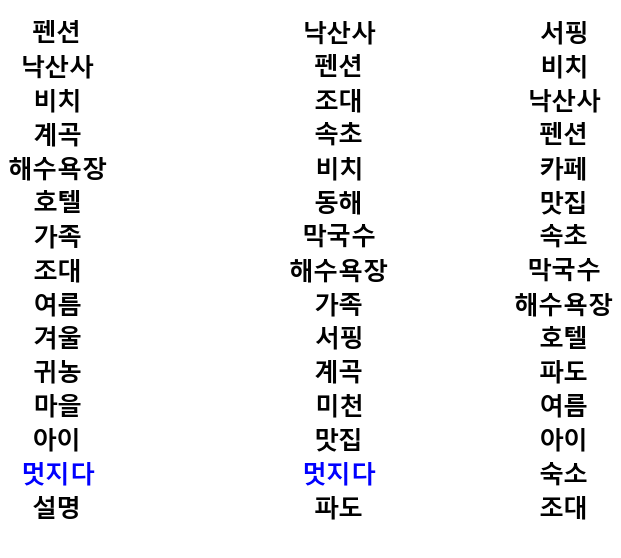

In [469]:
for i in range(0,3):
    sample = pd.read_csv(path + "/"+ one_set[i])
    year = one_set[i].split("_")[3][:4]

    #상위권중 불용어제외하고 15개만 선택
    head_sameple = sample['word'][:50]
    selected = head_sameple[~head_sameple.isin(out_word)]
    selected = selected[:15]
    ranked = pd.DataFrame(selected).reset_index(drop = True)
    #상위권이 위로가게끔
    ranked[year] = range(15,0,-1)
    ranked
    if i == 0:
        mm_ranked = ranked
    else :
        mm_ranked = pd.merge(mm_ranked,ranked, on = 'word',how = 'outer')


#멜팅
mm_ranked = mm_ranked.melt(id_vars = 'word')
mm_ranked['variable'] = mm_ranked['variable'].apply(lambda x : int(x.split("_")[0]))
mm_ranked= mm_ranked.dropna()

mm_ranked.reset_index(drop=True,inplace =True)
mm_ranked = mm_ranked.rename(columns = {"variable":"year"})

plt.figure(figsize=(10,10))
ax = sns.scatterplot(y= 'value', x = 'year',data = mm_ranked,color ='w')
for line in range(0, mm_ranked.shape[0]):
    if mm_ranked.word[line] in bad_word:
        ax.text(mm_ranked.year[line],mm_ranked.value[line],mm_ranked.word[line], horizontalalignment='center', size=25, color='red', weight='semibold')
    elif mm_ranked.word[line] in good_word:
        ax.text(mm_ranked.year[line],mm_ranked.value[line],mm_ranked.word[line], horizontalalignment='center', size=25, color='blue', weight='semibold')    
    else :
        ax.text(mm_ranked.year[line],mm_ranked.value[line],mm_ranked.word[line], horizontalalignment='center', size=25, color='black', weight='semibold')
ax.set_ylim(0,16)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.axis('off')
plt.show()    

### 단어군집화 필요